In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
inp0 = pd.read_csv('Cricket.csv', encoding='ISO-8859-1')
print(inp0.shape)
inp0.head()

(79, 13)


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [14]:
inp1 = inp0[[
    'SR',
    'Ave'
]]

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(inp1)
data_scaled = pd.DataFrame(data_scaled, columns=inp1.columns)
data_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [24]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SR      79 non-null     float64
 1   Ave     79 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,max_iter=500, random_state=100)
kmeans.fit(data_scaled)

KMeans(max_iter=500, n_clusters=4, random_state=100)

In [21]:
condition = inp0['Player'].str.contains('ayl')
inp0[condition]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
17,CH Gayle (ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23
46,LRPL Taylor (NZ),2006-2017,190,176,29,6486,131*,44.12,7906,82.03,17,37,9
69,BRM Taylor (ZIM),2004-2015,167,166,15,5258,145*,34.82,7060,74.47,8,32,13


In [26]:
data_inverse_scaled = scaler.inverse_transform(data_scaled)
data_inverse_scaled = pd.DataFrame(data_inverse_scaled, columns=['SR', 'Ave'])
data_inverse_scaled['cluster'] = kmeans.labels_
data_inverse_scaled

,SR,Ave,cluster
0,86.23,44.83,2
1,78.86,41.98,2
2,80.39,42.03,2
3,91.20,32.36,3
4,78.96,33.37,1
...,...,...,...
74,64.92,45.03,2
75,73.75,43.40,2
76,76.98,35.36,1
77,92.44,39.75,2


In [10]:
condition = data_inverse_scaled['cluster'] == 0
inp0[condition]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109*,48.15,6243,87.16,3,39,3


In [28]:
inp0['cluster'] = kmeans.labels_

In [47]:
condition = inp0['Player'].str.contains('ravi')
inp0[condition]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1


In [49]:
inp0.iloc[[42,0,8,17,63],:]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1
17,CH Gayle (ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23,2
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237*,43.30,6269,87.73,12,32,12,2


In [39]:
inp0.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,2
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,3
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1


In [22]:
data_inverse_scaled.iloc[17,:]

SR         85.11
Ave        37.33
cluster     2.00
Name: 17, dtype: float64

In [ ]:
yuvraj = 2
tendulkar = 2
gayle = 2
jayasuriya = 3



In [17]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

def try_hierarchical_clustering(input_data, linkage_method, num_cluster):
    print(f'doing heirarchical clustering for {input_data.columns}')
    mergings = linkage(input_data, method=linkage_method, metric='euclidean')
    cluster_labels = cut_tree(mergings, n_clusters=num_cluster).reshape(-1,)
    input_data['cluster'] = cluster_labels
    dendrogram(mergings)
    plt.title(f'{linkage_method} clusters = {num_cluster}')
    plt.show()

doing heirarchical clustering for Index(['SR', 'Ave'], dtype='object')


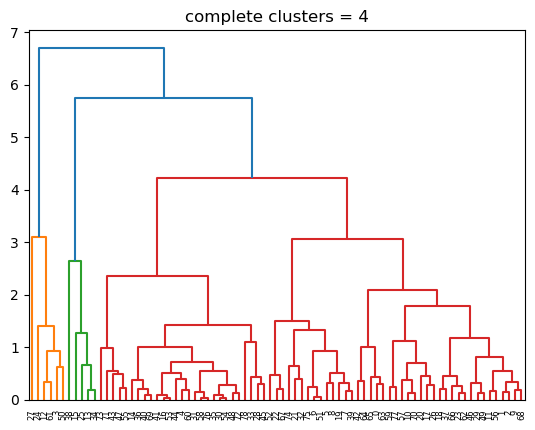

In [27]:
try_hierarchical_clustering(data_scaled, 'complete', 4)


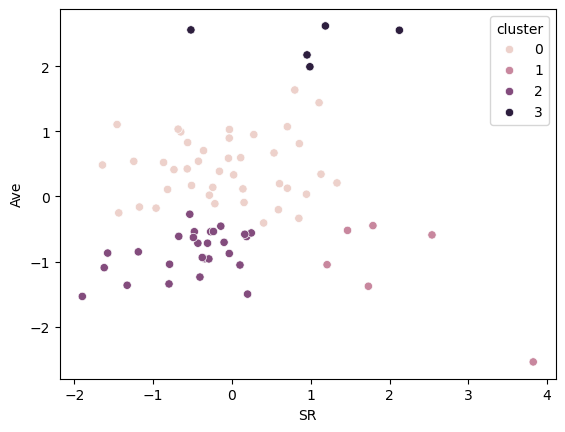

In [37]:
sns.scatterplot(data=data_scaled, x='SR', y='Ave', hue='cluster')
plt.show()

In [28]:
data_inverse_scaled['cluster'] = data_scaled['cluster']
data_inverse_scaled.head()

,SR,Ave,cluster
0,86.23,44.83,0
1,78.86,41.98,0
2,80.39,42.03,0
3,91.20,32.36,1
4,78.96,33.37,2


In [29]:
inp0['cluster'] = data_scaled['cluster']

In [31]:
inp0['cluster'].unique()

array([0, 1, 2, 3])

In [34]:
condition = inp0['cluster'] == 0
print(inp0[condition].shape)
inp0[condition]

(41, 14)


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,0
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,0
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,0
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,0
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,0
10,TM Dilshan (SL),1999-2016,330,303,41,10290,161*,39.27,11933,86.23,22,47,11,0
11,Mohammad Yousuf (Asia/PAK),1998-2010,288,273,40,9720,141*,41.71,12942,75.10,15,64,15,0


In [32]:
condition = inp0['cluster'] == 1
inp0[condition]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1
12,AC Gilchrist (AUS/ICC),1996-2008,287,279,11,9619,172,35.89,9922,96.94,16,55,19,1
24,V Sehwag (Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,7929,104.33,15,38,14,1
27,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,6892,117.00,6,39,30,1
50,BB McCullum (NZ),2002-2016,260,228,28,6083,166,30.41,6312,96.37,5,32,20,1
61,SK Raina (INDIA),2005-2015,223,192,35,5568,116*,35.46,5938,93.76,5,36,14,1


In [33]:
condition = inp0['cluster'] == 2
inp0[condition]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2
14,M Azharuddin (INDIA),1985-2000,334,308,54,9378,153*,36.92,12669,74.02,7,58,9,2
16,PA de Silva (SL),1984-2003,308,296,30,9284,145,34.90,11443,81.13,11,64,17,2
28,SP Fleming (ICC/NZ),1994-2007,280,269,21,8037,134*,32.40,11242,71.49,8,49,17,2
30,SR Waugh (AUS),1986-2002,325,288,58,7569,120*,32.90,9971,75.91,3,45,15,2
31,A Ranatunga (SL),1982-1999,269,255,47,7456,131*,35.84,9571,77.90,4,49,18,2
33,Younis Khan (PAK),2000-2015,265,255,23,7249,144,31.24,9628,75.29,7,48,22,2
35,Saleem Malik (PAK),1982-1999,283,256,38,7170,102,32.88,9383,76.41,5,47,19,2
36,NJ Astle (NZ),1995-2007,223,217,14,7090,145*,34.92,9760,72.64,16,41,19,2
40,A Flower (ZIM),1992-2003,213,208,16,6786,145,35.34,9097,74.59,4,55,13,2


In [35]:
condition = inp0['cluster'] == 3
inp0[condition]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,3
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,3
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,3
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,3
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,3
